<a href="https://colab.research.google.com/github/Sanjanathakal/MA630/blob/master/MA630_Assignmet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MA630
###Assignment 5 
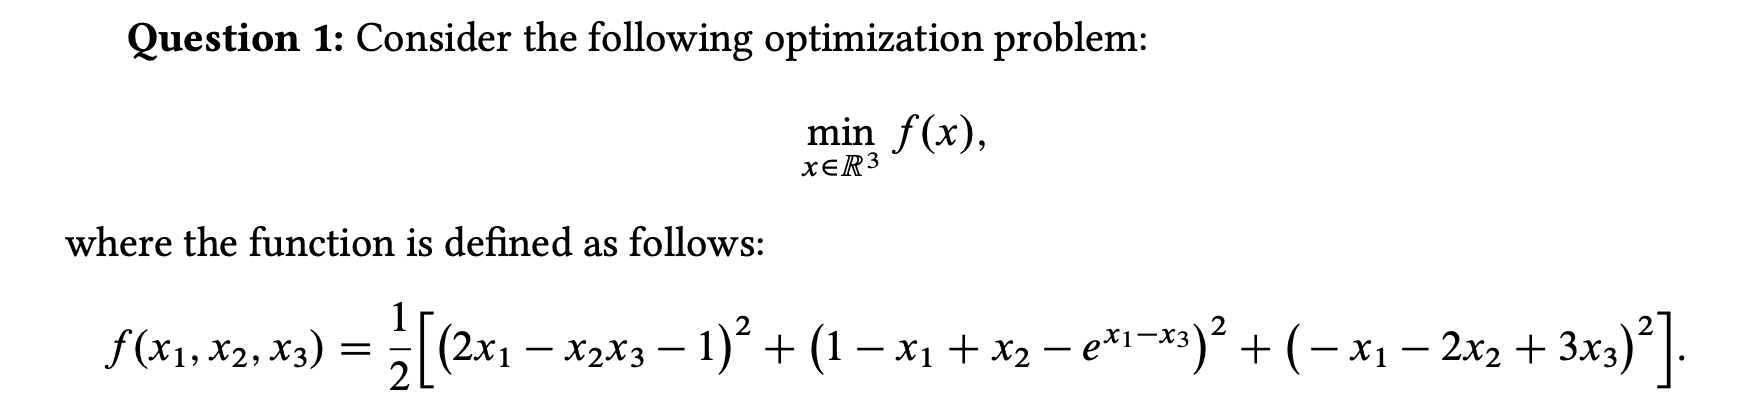


###Code a function that calculates the values of f , its gradient, and its Hessian at a given point.


In [1]:
import numpy
from sympy import symbols, Eq, solve, log, Matrix

##TO FIND THE GRADIENT

def partial(element, function):

	partial_diff = function.diff(element)

	return partial_diff


def gradient(partials):

	grad = numpy.matrix([[partials[0]], [partials[1]], [partials[2]]])

	return grad

## TO FIND THE HESSIAN 

def hessian(partials_second):
	
	hessianmat = numpy.matrix([[partials_second[0], partials_second[1],partials_second[2]], [partials_second[3], partials_second[4],partials_second[5]],[partials_second[6], partials_second[7],partials_second[8]]])

	return hessianmat


In [2]:
import numpy as np
from sympy import symbols, Eq, solve, log
from sympy.functions import exp
def main():

  x, y, z = symbols('x y z ');
  symbols_list = [x , y, z];
  A = (2*x - y*z - 1)
  B = ( 1 - x + y - exp(y-z))
  C = (-x-2*y + 3*z)
  function = (1/2)*(A*A + B*B + C*C )
  print("The function f is :" ,function)
  partials, partials_second = [], []
  
  for element in symbols_list:
    partial_diff = partial(element, function)
    partials.append(partial_diff)
  

  grad = gradient(partials)
  print("The gradient of the funtion is: \n",grad)
  
  
  for i in range(0, len(symbols_list)):
    for j in range(0, len(partials)):
      partial_diff = partial(symbols_list[i], partials[j])
      partials_second.append(partial_diff)
  
  #print(partials_second)
  
  hessianmat = hessian(partials_second)
  

  print("Hessian matrix that organizes all the second partial derivatives of the function is :\n", hessianmat)
  
main()


The function f is : 0.5*(-x - 2*y + 3*z)**2 + 0.5*(2*x - y*z - 1)**2 + 0.5*(-x + y - exp(y - z) + 1)**2
The gradient of the funtion is: 
 [[6.0*x - 2.0*y*z + 1.0*y - 3.0*z + 1.0*exp(y - z) - 3.0]
 [2.0*x + 4.0*y - 1.0*z*(2*x - y*z - 1) - 6.0*z + 0.5*(2 - 2*exp(y - z))*(-x + y - exp(y - z) + 1)]
 [-3.0*x - 1.0*y*(2*x - y*z - 1) - 6.0*y + 9.0*z + 1.0*(-x + y - exp(y - z) + 1)*exp(y - z)]]
Hessian matrix that organizes all the second partial derivatives of the function is :
 [[6.00000000000000 -2.0*z + 1.0*exp(y - z) + 1.0
  -2.0*y - 1.0*exp(y - z) - 3.0]
 [-2.0*z + 1.0*exp(y - z) + 1.0
  1.0*z**2 + (1 - exp(y - z))*(1.0 - 1.0*exp(y - z)) - 1.0*(-x + y - exp(y - z) + 1)*exp(y - z) + 4.0
  -2.0*x + 2.0*y*z + (1.0 - 1.0*exp(y - z))*exp(y - z) + (-1.0*x + 1.0*y - 1.0*exp(y - z) + 1.0)*exp(y - z) - 5.0]
 [-2.0*y - 1.0*exp(y - z) - 3.0
  -2.0*x + 2.0*y*z + (1.0 - 1.0*exp(y - z))*exp(y - z) + 1.0*(-x + y - exp(y - z) + 1)*exp(y - z) - 5.0
  1.0*y**2 - (-1.0*x + 1.0*y - 1.0*exp(y - z) + 1.0)*exp

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import sys
from typing import Callable, List, Tuple, Union

In [4]:
def banana(x: List[float], nargout: int) -> Union[float, Tuple]:
    A = (2* x[0] - x[1] * x[2] - 1)
    B = ( 1 - x[0] + x[1] - np.exp(x[0]-x[2]))
    C = (-x[0]-2*x[1]+3*x[2])
    fun_val = (1/2)*(A*A + B*B + C*C )
    if nargout < 2:
        return fun_val
    fun_grad = np.array([
        5.0*x[0] - 2.0*x[1]*x[2] + 2.0*x[1] - 3.0*x[2] + 0.5*(-2*np.exp(x[0] - x[2]) - 2)*(-x[0] + x[1] - np.exp(x[0] - x[2]) + 1) - 2.0,
        1.0*x[0] + 5.0*x[1] - 1.0*x[2]*(2*x[0] - x[1]*x[2] - 1) - 6.0*x[2] - 1.0*np.exp(x[0] - x[2]) + 1.0, 
        -3.0*x[0] - 1.0*x[1]*(2*x[0] - x[1]*x[2] - 1) - 6.0*x[1] + 9.0*x[2] + 1.0*(-x[0] + x[1] - np.exp(x[0] - x[2]) + 1)*np.exp(x[0] - x[2])
        ])
    if nargout < 3:
        return fun_val, fun_grad
    fun_hess = np.array([
        [(-np.exp(x[0] - x[2]) - 1)*(-1.0*np.exp(x[0] - x[2]) - 1.0) - 1.0*(-x[0] + x[1] - np.exp(x[0] - x[2]) + 1)*np.exp(x[0] - x[2]) + 5.0,
        -2.0*x[2] - 1.0*np.exp(x[0] - x[2]) + 1.0,
        -2.0*x[1] + (-1.0*np.exp(x[0] - x[2]) - 1.0)*np.exp(x[0] - x[2]) + 1.0*(-x[0] + x[1] - np.exp(x[0] - x[2]) + 1)*np.exp(x[0] - x[2]) - 3.0],
        [-2.0*x[2] - 1.0*np.exp(x[0] - x[2]) + 1.0,
        1.0*x[2]**2 + 5.0,
        -2.0*x[0] + 2.0*x[1]*x[2] + 1.0*np.exp(x[0] - x[1]) - 5.0],
        [-2.0*x[1] + (-1.0*np.exp(x[0] - x[2]) - 1.0)*np.exp(x[0] - x[2]) + (-1.0*x[0] + 1.0*x[1] - 1.0*np.exp(x[0] - x[2]) + 1.0)*np.exp(x[0] - x[2]) - 3.0,
        -2.0*x[0] + 2.0*x[1]*x[2] + 1.0*np.exp(x[0] - x[2]) - 5.0,
        1.0*x[1]**2 - (-1.0*x[0] + 1.0*x[1] - 1.0*np.exp(x[0] - x[2]) + 1.0)*np.exp(x[0] - x[2]) + 1.0*np.exp(2*x[0] - 2*x[2]) + 9.0]
                        ])
    return fun_val, fun_grad, fun_hess


#### Q1.a Check that the minimum is attained at the point x =(1; 1; 1)

In [5]:
A,B,C = banana([1,1,1],3)
print("The value of the gradient of the funtion when the points 1, 1, 1 are substituted are",B)

The value of the gradient of the funtion when the points 1, 1, 1 are substituted are [0. 0. 0.]


### This therefore proves that the value of gradient of the funtion f is 0 at (1,1,1). Which proves that this is a point of minimum. 

#### Q1.b Use the provided code of the Steepest-decent method,the Newton’s method,and the Conjugate- gradient method to analyze the behavior of the methods when you use different starting points, e.g., (.0; 0; 0), (1:5; 0:5; 0:5), and (4,5,6).
#### What is the reason for the different results when using different starting points?

In [6]:
def direction_minimization(func: Callable, x0: List[float], d: np.ndarray,
                           sL: float, val0: float, t0: float,
                           toldir: float, itmax: int = 50, cut: float = 0.1,
                           increase: int = 3) -> Tuple[float, float]:

    # itmax = 50
    # cut = 0.1
    # increase = 3
    small = 1E-8 * t0

    tR = 0
    tL = 0
    # sL = s0
    vL = val0
    vR = val0
    val = val0

    t = t0
    if t0 < 0:
        t = 1

    for i in range(itmax):

        x = x0 + t*d
        val, grad = func(x , 2)
        s = np.dot(d, grad)
        if (abs(s) < toldir) and (val < val0):
            break
        if (s > 0) or (val > val0):
            tR = t
            sR = s
            vR = val
        else:
            tL = t
            sL = s
            vL = val

        if tR > 0:
            a = sL + sR - 3*(vR - vL)/(tR - tL)
            b = np.sqrt(a**2 - sL*sR)
            t = tR - (tR - tL)*(sR + b - a)/(sR - sL + 2*b)
            t = max(t, tL + cut*(tR - tL))
            t = min(t, tL + (1 - cut)*(tR - tL))
        else:
             t = increase*t

        if t < small:
            break

    if vL < val:
        t = tL
        val = vL
        x = x0 + tL*d

    if vR < val:
        t = tR
        val = vR
        x = x0 + tR*d

    if val >= val0:
        t = 0
        x = x0

    return x, t


In [7]:
def steepest_descent(func: Callable, x: List[float], step_size: float,
                     max_iter: int = 100, tolerance: float = 1E-4
                     ) -> List[np.ndarray]:

    x = np.array(x)
    point_trajectory = [x]

    for i in range(max_iter):
        fun_val, fun_grad = func(x, 2)
        norm_grad = np.linalg.norm(fun_grad)
        print(f'it={str(i).zfill(3)}  f={fun_val:.5f}  |grad f|={norm_grad:.5f}')

        x_values = json.dumps(np.around(x, decimals=4).tolist())
        print(f'  x = {x_values}')
        if norm_grad < tolerance or step_size == 0:
            break

        x, new_direction = direction_minimization(
            func=func,
            x0=x,
            d=-fun_grad,
            sL=-norm_grad**2,
            val0=fun_val,
            t0=step_size/norm_grad,
            toldir=tolerance)
        step_size = norm_grad * new_direction

        point_trajectory += [x]

    return point_trajectory

In [8]:
def newton_method(func: Callable, x: List[float], step_size: float,
                  max_iter: int = 100, tolerance: float = 1E-4
                  ) -> List[np.ndarray]:

    x = np.array(x)
    point_trajectory = [x]

    for i in range(max_iter):
        fun_val, fun_grad, fun_hess = func(x, 3)
        norm_grad = np.linalg.norm(fun_grad)

        print(f'it={str(i).zfill(3)}  f={fun_val:.5f}  |grad f|={norm_grad:.5f}')

        x_values = json.dumps(np.around(x, decimals=4).tolist())
        print(f'  x = {x_values}')

        if norm_grad < tolerance or step_size == 0:
            break

        kappa = np.linalg.cond(fun_hess)
        direction = np.linalg.solve(fun_hess, -fun_grad)

        s = 0
        if kappa != np.inf:
            s = np.dot(direction, fun_grad)

        init_step = 1
        use_steepest = False

        if s >= 0:
            direction = -fun_grad
            s = -norm_grad**2
            init_step = step_size / norm_grad
            use_steepest = True

        toldir = -0.1 * s
        x, step_size = direction_minimization(
            func=func,
            x0=x,
            d=direction,
            sL=s,
            val0=fun_val,
            t0=init_step,
            toldir=toldir
        )

        point_trajectory += [x]

        if use_steepest and step_size == 0:
            break

    return point_trajectory

In [9]:
def conjugate_gradient(func: Callable, x: List[float], step_size: float,
                       max_iter: int = 100, tolerance: float = 1E-4
                       ) -> List[np.ndarray]:
    x = np.array(x)
    point_trajectory = [x]
    cur_step_size = step_size
    step_size_tol = 1.0E-10

    max_cycles = min(10, len(x))
    cycle = 0

    prev_fun_grad = np.zeros(len(x))
    prev_direction = 0
    prev_norm_grad = 1
    for i in range(max_iter):
        fun_val, fun_grad = func(x, 2)
        norm_grad = np.linalg.norm(fun_grad)

        print(f'it={str(i).zfill(3)}  f={fun_val:.5f} '
              f' |grad f|={norm_grad:.5f}')

        x_values = json.dumps(np.around(x, decimals=4).tolist())
        print(f'  x = {x_values}')

        if norm_grad < tolerance:
            break

        s = -norm_grad**2
        direction = -fun_grad
        if cycle > 0:
            grad_delta = fun_grad - prev_fun_grad
            alpha = np.dot(grad_delta, fun_grad) / prev_norm_grad**2
            direction = (alpha * prev_direction) - fun_grad
            s = np.dot(direction, fun_grad)

            if s >= -tolerance**2:
                direction = -fun_grad
                s = -norm_grad**2
                cycle = 0

        prev_fun_grad = fun_grad
        prev_direction = direction
        prev_norm_grad = norm_grad

        if cur_step_size <= step_size_tol:
            cur_step_size = step_size

        norm_direction = np.linalg.norm(direction)
        toldir = tolerance * norm_direction
        init_step = cur_step_size / norm_direction
        x, cur_step_size = direction_minimization(
            func=func,
            x0=x,
            d=direction,
            sL=s,
            val0=fun_val,
            t0=init_step,
            toldir=toldir
        )

        point_trajectory += [x]

        if cycle == 0 and cur_step_size == 0:
            break
        if cycle == max_cycles or cur_step_size == 0:
            cycle = 0
        else:
            cycle += 1

        cur_step_size = cur_step_size * norm_direction

    return point_trajectory




Streaming output truncated to the last 5000 lines.
it=19348  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19349  f=0.00000  |grad f|=0.00171
  x = [0.9746, 0.9743, 0.9743]
it=19350  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19351  f=0.00000  |grad f|=0.00171
  x = [0.9746, 0.9743, 0.9743]
it=19352  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19353  f=0.00000  |grad f|=0.00171
  x = [0.9746, 0.9743, 0.9743]
it=19354  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19355  f=0.00000  |grad f|=0.00171
  x = [0.9746, 0.9743, 0.9743]
it=19356  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19357  f=0.00000  |grad f|=0.00171
  x = [0.9746, 0.9743, 0.9743]
it=19358  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19359  f=0.00000  |grad f|=0.00171
  x = [0.9746, 0.9744, 0.9743]
it=19360  f=0.00000  |grad f|=0.00171
  x = [0.9745, 0.9743, 0.9745]
it=19361  f=0.00000  |grad f|=0.00171
  x = [0.9746,

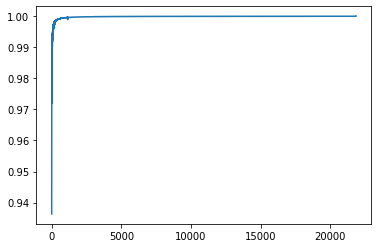

Limit of Sequence 2: 


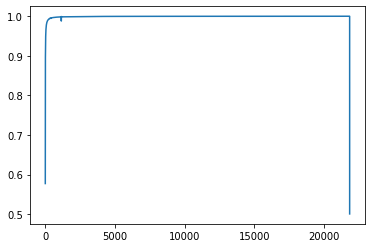

Streaming output truncated to the last 5000 lines.
it=27501  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27502  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27503  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27504  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27505  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27506  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27507  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27508  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27509  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27510  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27511  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27512  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27513  f=0.00000  |grad f|=0.00002
  x = [0.9787, 0.9786, 0.9786]
it=27514  f=0.00000  |grad f|=0.00002
  x = [0.9787,

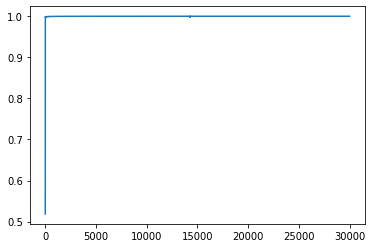

Limit of Sequence 2: 


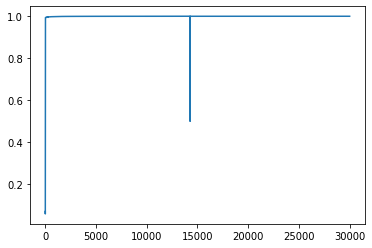

Streaming output truncated to the last 5000 lines.
it=27501  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27502  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27503  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27504  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27505  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27506  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27507  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27508  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27509  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27510  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27511  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27512  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27513  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.022]
it=27514  f=0.00000  |grad f|=0.00002
  x = [1.0221, 1.0219, 1.02

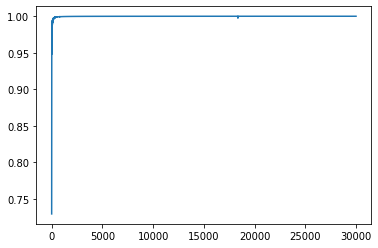

Limit of Sequence 2: 


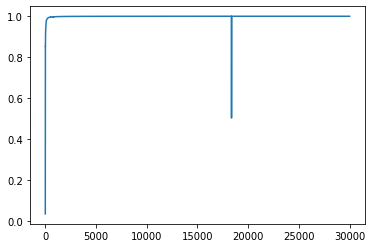

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [30]:
METHOD_DICT = {
    'steepest_descent': steepest_descent
}
def main():
    point_trajectories = []
    y = [[0,0,0], [1.5,0.5,0.5],[4,5,6]]
    step_size = 1.0
    max_iter = 30000
    tolerance = 1E-5
    
    x_hat = [1,1,1]
    fn_val, fn_grad, fn_hess = banana(x_hat,3)
    for i in range(0,len(y)):
      seq1 = []
      seq2 = []
      for name, func in METHOD_DICT.items():
        print(f'running {name}')
        path = func(banana, y[i], step_size, max_iter, tolerance)
        point_trajectories += [path]
        print('###############################################################')
      
      for p in range(len(point_trajectories[i])-1):
        num = point_trajectories[i][p+1] - x_hat
        den = point_trajectories[i][p] - x_hat 
        seq1.append(np.linalg.norm(num) / np.linalg.norm(den))
        
        x1 = np.array(point_trajectories[i][p+1])
        x2 = np.array(point_trajectories[i][p])
        val1, g1, h1 = banana(x1,3)
        val2, g2, h2 = banana(x2,3)
        seq2.append((val1 - fn_val) / (val2 - fn_val))
       

      print("Limit of Sequence 1: ")
      plt.plot(seq1)
      plt.show() 
      print("Limit of Sequence 2: ")
      plt.plot(seq2)
      plt.show()

if __name__ == "__main__":
    sys.exit(main())

####point 1 [0,0,0] : iteration: 21846
####point 2 [1.5, 0.5, 0.5] : iteration: 29999
####point 3 [4, 5, 6] : iteration : 29999

running newton_method
it=000  f=0.50000  |grad f|=2.00000
  x = [0, 0, 0]
it=001  f=0.06530  |grad f|=0.58664
  x = [0.477, 0.2806, 0.3508]
it=002  f=0.00868  |grad f|=0.22246
  x = [0.6212, 0.6089, 0.611]
it=003  f=0.00094  |grad f|=0.08293
  x = [0.7968, 0.7707, 0.7807]
it=004  f=0.00010  |grad f|=0.01702
  x = [0.8671, 0.8638, 0.8649]
it=005  f=0.00000  |grad f|=0.00292
  x = [0.9821, 0.9817, 0.9818]
it=006  f=0.00000  |grad f|=0.00082
  x = [0.982, 0.9818, 0.9819]
it=007  f=0.00000  |grad f|=0.00009
  x = [0.988, 0.988, 0.988]
it=008  f=0.00000  |grad f|=0.00004
  x = [0.996, 0.996, 0.996]
it=009  f=0.00000  |grad f|=0.00001
  x = [0.9972, 0.9972, 0.9972]
###############################################################
Limit of Sequence 1: 


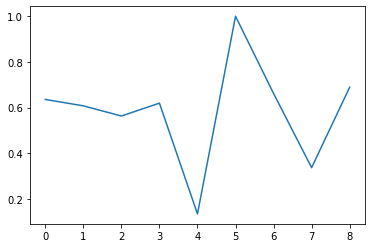

Limit of Sequence 2: 


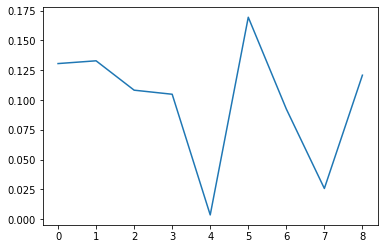

running newton_method
it=000  f=5.72578  |grad f|=18.51464
  x = [1.5, 0.5, 0.5]
it=001  f=0.06220  |grad f|=1.18540
  x = [0.836, 0.9435, 0.7951]
it=002  f=0.00175  |grad f|=0.19464
  x = [1.1405, 1.1586, 1.1503]
it=003  f=0.00007  |grad f|=0.00205
  x = [1.1334, 1.1285, 1.1301]
it=004  f=0.00001  |grad f|=0.01089
  x = [1.0616, 1.0618, 1.0617]
it=005  f=0.00000  |grad f|=0.00157
  x = [1.0441, 1.0433, 1.0436]
it=006  f=0.00000  |grad f|=0.00118
  x = [1.0248, 1.0248, 1.0248]
it=007  f=0.00000  |grad f|=0.00033
  x = [1.0152, 1.0151, 1.0152]
it=008  f=0.00000  |grad f|=0.00009
  x = [1.0093, 1.0093, 1.0093]
it=009  f=0.00000  |grad f|=0.00001
  x = [1.0012, 1.0012, 1.0012]
it=010  f=0.00000  |grad f|=0.00000
  x = [0.9993, 0.9993, 0.9993]
###############################################################
Limit of Sequence 1: 


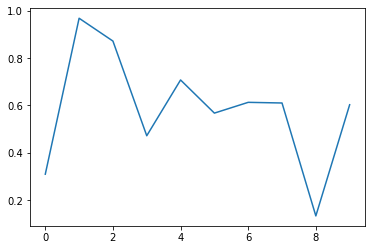

Limit of Sequence 2: 


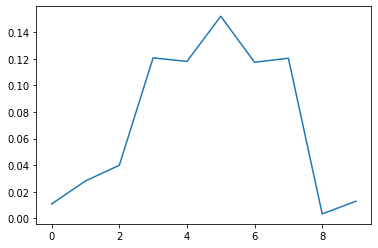

running newton_method
it=000  f=274.23849  |grad f|=190.51938
  x = [4, 5, 6]
it=001  f=100.37121  |grad f|=70.74021
  x = [6.9441, 4.8032, 5.344]
it=002  f=2.40608  |grad f|=7.55686
  x = [2.2826, 1.2198, 1.9815]
it=003  f=1.79475  |grad f|=4.88480
  x = [2.9343, 1.848, 2.6063]
it=004  f=0.18537  |grad f|=0.79241
  x = [2.0984, 1.892, 1.9041]
it=005  f=0.02034  |grad f|=0.63876
  x = [1.4639, 1.4341, 1.4716]
it=006  f=0.00269  |grad f|=0.11564
  x = [1.3375, 1.3074, 1.3094]
it=007  f=0.00036  |grad f|=0.06631
  x = [1.1766, 1.1731, 1.1759]
it=008  f=0.00004  |grad f|=0.01940
  x = [1.1111, 1.1064, 1.1072]
it=009  f=0.00001  |grad f|=0.00441
  x = [1.0655, 1.0648, 1.065]
it=010  f=0.00000  |grad f|=0.00078
  x = [1.0089, 1.0088, 1.0088]
it=011  f=0.00000  |grad f|=0.00040
  x = [1.0145, 1.0144, 1.0145]
it=012  f=0.00000  |grad f|=0.00009
  x = [1.0084, 1.0084, 1.0084]
it=013  f=0.00000  |grad f|=0.00005
  x = [1.0013, 1.0013, 1.0013]
it=014  f=0.00000  |grad f|=0.00000
  x = [1.0015, 1

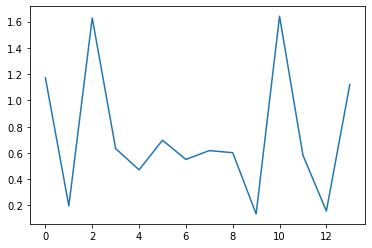

Limit of Sequence 2: 


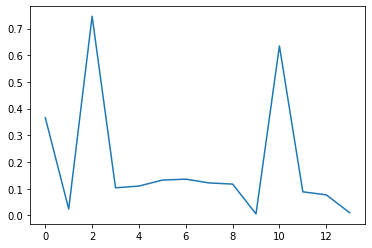

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [28]:

METHOD_DICT = {'newton_method': newton_method}
def main():
    point_trajectories = []
    y = [[0,0,0], [1.5,0.5,0.5],[4,5,6]]
    step_size = 1.0
    max_iter = 30000
    tolerance = 1E-5
    
    x_hat = [1,1,1]
    fn_val, fn_grad, fn_hess = banana(x_hat,3)
    for i in range(0,len(y)):
      seq1 = []
      seq2 = []
      for name, func in METHOD_DICT.items():
        print(f'running {name}')
        path = func(banana, y[i], step_size, max_iter, tolerance)
        point_trajectories += [path]
        print('###############################################################')
      
      for p in range(len(point_trajectories[i])-1):
        num = point_trajectories[i][p+1] - x_hat
        den = point_trajectories[i][p] - x_hat 
        seq1.append(np.linalg.norm(num) / np.linalg.norm(den))
        
        x1 = np.array(point_trajectories[i][p+1])
        x2 = np.array(point_trajectories[i][p])
        val1, g1, h1 = banana(x1,3)
        val2, g2, h2 = banana(x2,3)
        seq2.append((val1 - fn_val) / (val2 - fn_val))
       

      print("Limit of Sequence 1: ")
      plt.plot(seq1)
      plt.show() 
      print("Limit of Sequence 2: ")
      plt.plot(seq2)
      plt.show()

if __name__ == "__main__":
    sys.exit(main())

####point 1 [0,0,0] : iteration: 10 
####point 2 [1.5, 0.5, 0.5] : iteration: 9
####point 3 [4, 5, 6] : iteration : 14

running conjugate_gradient
it=000  f=0.50000  |grad f|=2.00000
  x = [0, 0, 0]
it=001  f=0.28860  |grad f|=1.15305
  x = [0.2061, 0.0, 0.0]
it=002  f=0.19526  |grad f|=0.73992
  x = [0.2995, 0.0032, 0.1619]
it=003  f=0.03051  |grad f|=0.42129
  x = [0.5051, 0.4933, 0.4633]
it=004  f=0.01156  |grad f|=0.28033
  x = [0.5989, 0.5469, 0.5849]
it=005  f=0.00912  |grad f|=0.05428
  x = [0.6096, 0.5543, 0.5734]
it=006  f=0.00714  |grad f|=0.14289
  x = [0.6328, 0.6132, 0.6114]
it=007  f=0.00056  |grad f|=0.07119
  x = [0.8292, 0.8095, 0.8223]
it=008  f=0.00019  |grad f|=0.03150
  x = [0.8484, 0.8401, 0.8409]
it=009  f=0.00016  |grad f|=0.00249
  x = [0.8473, 0.8399, 0.8424]
it=010  f=0.00016  |grad f|=0.00804
  x = [0.8486, 0.8427, 0.8441]
it=011  f=0.00001  |grad f|=0.01433
  x = [0.9321, 0.932, 0.9324]
it=012  f=0.00001  |grad f|=0.00358
  x = [0.9355, 0.9347, 0.9346]
it=013  f=0.00000  |grad f|=0.00129
  x = [0.9356, 0.9344, 0.9348]
it=014  f=0.00000  |grad f|=0.00016
  x = [0.9357, 0.9344

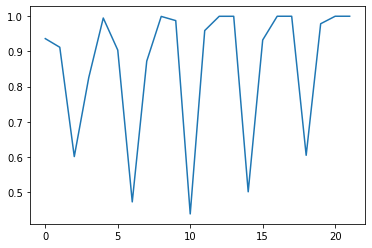

Limit of Sequence 2: 


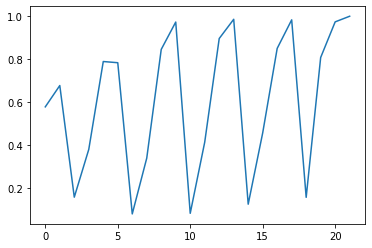

running conjugate_gradient
it=000  f=5.72578  |grad f|=18.51464
  x = [1.5, 0.5, 0.5]
it=001  f=0.40644  |grad f|=2.77633
  x = [0.9495, 0.56, 0.9245]
it=002  f=0.00150  |grad f|=0.18796
  x = [0.8187, 0.7956, 0.7945]
it=003  f=0.00040  |grad f|=0.00492
  x = [0.8094, 0.7976, 0.8016]
it=004  f=0.00038  |grad f|=0.02081
  x = [0.8142, 0.8061, 0.807]
it=005  f=0.00035  |grad f|=0.00846
  x = [0.8151, 0.8047, 0.8085]
it=006  f=0.00035  |grad f|=0.00518
  x = [0.8159, 0.8047, 0.8085]
it=007  f=0.00004  |grad f|=0.02203
  x = [0.9033, 0.9033, 0.9033]
it=008  f=0.00002  |grad f|=0.00969
  x = [0.9118, 0.9101, 0.9098]
it=009  f=0.00002  |grad f|=0.00258
  x = [0.9117, 0.9097, 0.9103]
it=010  f=0.00002  |grad f|=0.00043
  x = [0.9119, 0.9095, 0.9103]
it=011  f=0.00000  |grad f|=0.00452
  x = [0.9558, 0.9558, 0.9557]
it=012  f=0.00000  |grad f|=0.00199
  x = [0.9591, 0.9586, 0.9586]
it=013  f=0.00000  |grad f|=0.00040
  x = [0.959, 0.9586, 0.9587]
it=014  f=0.00000  |grad f|=0.00004
  x = [0.95

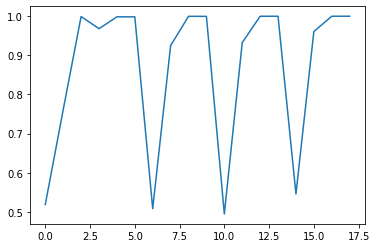

Limit of Sequence 2: 


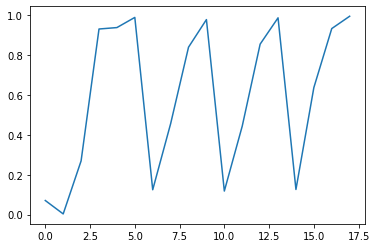

running conjugate_gradient
it=000  f=274.23849  |grad f|=190.51938
  x = [4, 5, 6]
it=001  f=9.99258  |grad f|=8.10810
  x = [4.8619, 2.8191, 3.8954]
it=002  f=7.61833  |grad f|=10.25324
  x = [4.2369, 2.5709, 3.8538]
it=003  f=0.62171  |grad f|=2.60542
  x = [0.3969, -0.255, 0.0505]
it=004  f=0.46306  |grad f|=1.26298
  x = [0.1999, -0.2578, -0.0183]
it=005  f=0.25906  |grad f|=0.95089
  x = [0.1733, 0.0589, 0.0448]
it=006  f=0.06639  |grad f|=1.01245
  x = [0.4406, 0.35, 0.4545]
it=007  f=0.02088  |grad f|=0.24558
  x = [0.5608, 0.4554, 0.4917]
it=008  f=0.01193  |grad f|=0.19979
  x = [0.591, 0.5622, 0.5546]
it=009  f=0.00981  |grad f|=0.09633
  x = [0.5988, 0.5506, 0.5705]
it=010  f=0.00928  |grad f|=0.06639
  x = [0.6108, 0.5515, 0.5722]
it=011  f=0.00122  |grad f|=0.10653
  x = [0.7765, 0.7768, 0.7753]
it=012  f=0.00055  |grad f|=0.05481
  x = [0.8045, 0.7944, 0.7931]
it=013  f=0.00046  |grad f|=0.01187
  x = [0.8035, 0.7929, 0.7961]
it=014  f=0.00045  |grad f|=0.00580
  x = [0.8

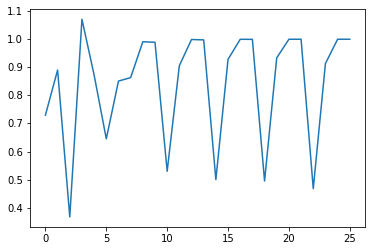

Limit of Sequence 2: 


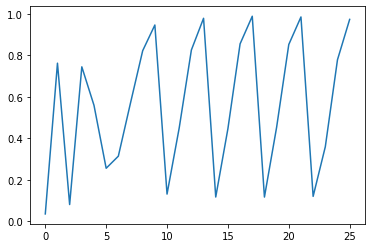

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [27]:

METHOD_DICT = {'conjugate_gradient': conjugate_gradient
}
def main():
    point_trajectories = []
    y = [[0,0,0], [1.5,0.5,0.5],[4,5,6]]
    step_size = 1.0
    max_iter = 30000
    tolerance = 1E-5
    
    x_hat = [1,1,1]
    fn_val, fn_grad, fn_hess = banana(x_hat,3)
    for i in range(0,len(y)):
      seq1 = []
      seq2 = []
      for name, func in METHOD_DICT.items():
        print(f'running {name}')
        path = func(banana, y[i], step_size, max_iter, tolerance)
        point_trajectories += [path]
        print('###############################################################')
      
      for p in range(len(point_trajectories[i])-1):
        num = point_trajectories[i][p+1] - x_hat
        den = point_trajectories[i][p] - x_hat 
        seq1.append(np.linalg.norm(num) / np.linalg.norm(den))
        
        x1 = np.array(point_trajectories[i][p+1])
        x2 = np.array(point_trajectories[i][p])
        val1, g1, h1 = banana(x1,3)
        val2, g2, h2 = banana(x2,3)
        seq2.append((val1 - fn_val) / (val2 - fn_val))
       

      print("Limit of Sequence 1: ")
      plt.plot(seq1)
      plt.show() 
      print("Limit of Sequence 2: ")
      plt.plot(seq2)
      plt.show()

if __name__ == "__main__":
    sys.exit(main())

####point 1 [0,0,0] : iteration: 22
####point 2 [1.5, 0.5, 0.5] : iteration: 18
####point 3 [4, 5, 6] : iteration : 26

### We can see from the number of iterations from all three methods that Newton’s method converges the fastest whereas Steepest Descent converges the slowest and Conjugate Gradient is slower than Newton’s but a lot faster than Steepest descent.

#### Q1.c Solve the problems using the Gauss-Newton’s method. For this purpose, you can use the code of the Newton’s method but program the calculation of the Hessian of f in a different way: approximate it as the Gauss-Newton method suggests. How do the four methods: Steepest decent, Newton, Gauss-Newton, and Conjugate gradient, compare?

In [25]:
def gaussnew(func: Callable, x: List[float], step_size: float,
                  max_iter: int = 30000, tolerance: float = 1E-4
                  ) -> List[np.ndarray]:

    x = np.array(x)
    point_trajectory = [x]
    d=np.array([[0.00001, 0, 0],[0, 0.00001, 0],[0, 0, 0.00001]])

    for i in range(max_iter):
        fun_val, fun_grad = func(x, 2)
        fun_hess = np.outer(fun_grad, np.transpose(fun_grad)) + d 
        norm_grad = np.linalg.norm(fun_grad)

        print(f'it={str(i).zfill(3)}  f={fun_val:.5f}  |grad f|={norm_grad:.5f}')

        x_values = json.dumps(np.around(x, decimals=4).tolist())
        print(f'  x = {x_values}')

        if norm_grad < tolerance or step_size == 0:
            break

        kappa = np.linalg.cond(fun_hess)
        direction = np.linalg.solve(fun_hess, -fun_grad)

        s = 0
        if kappa != np.inf:
            s = np.dot(direction, fun_grad)

        init_step = 1
        use_steepest = False

        if s >= 0:
            direction = -fun_grad
            s = -norm_grad**2
            init_step = step_size / norm_grad
            use_steepest = True

        toldir = -0.1 * s
        x, step_size = direction_minimization(
            func=func,
            x0=x,
            d=direction,
            sL=s,
            val0=fun_val,
            t0=init_step,
            toldir=toldir
        )

        point_trajectory += [x]

        if use_steepest and step_size == 0:
            break

    return point_trajectory

Streaming output truncated to the last 5000 lines.
it=12782  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9737]
it=12783  f=0.00000  |grad f|=0.00002
  x = [0.9739, 0.9737, 0.9737]
it=12784  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9738]
it=12785  f=0.00000  |grad f|=0.00002
  x = [0.9739, 0.9737, 0.9738]
it=12786  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9738]
it=12787  f=0.00000  |grad f|=0.00002
  x = [0.9739, 0.9737, 0.9738]
it=12788  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9738]
it=12789  f=0.00000  |grad f|=0.00002
  x = [0.9739, 0.9737, 0.9738]
it=12790  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9738]
it=12791  f=0.00000  |grad f|=0.00002
  x = [0.9739, 0.9737, 0.9738]
it=12792  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9738]
it=12793  f=0.00000  |grad f|=0.00002
  x = [0.9739, 0.9737, 0.9738]
it=12794  f=0.00000  |grad f|=0.00001
  x = [0.9739, 0.9737, 0.9738]
it=12795  f=0.00000  |grad f|=0.00002
  x = [0.9739,

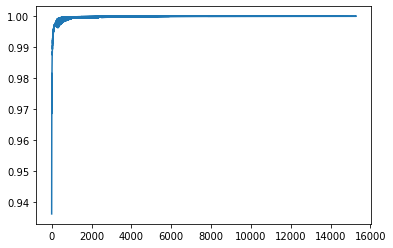

Limit of Sequence 2: 


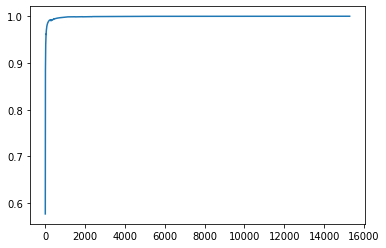

Streaming output truncated to the last 5000 lines.
it=16639  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16640  f=0.00000  |grad f|=0.00002
  x = [0.9743, 0.9741, 0.9742]
it=16641  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16642  f=0.00000  |grad f|=0.00002
  x = [0.9743, 0.9741, 0.9742]
it=16643  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16644  f=0.00000  |grad f|=0.00002
  x = [0.9743, 0.9741, 0.9742]
it=16645  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16646  f=0.00000  |grad f|=0.00002
  x = [0.9743, 0.9741, 0.9742]
it=16647  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16648  f=0.00000  |grad f|=0.00002
  x = [0.9743, 0.9741, 0.9742]
it=16649  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16650  f=0.00000  |grad f|=0.00002
  x = [0.9743, 0.9741, 0.9742]
it=16651  f=0.00000  |grad f|=0.00001
  x = [0.9743, 0.9741, 0.9742]
it=16652  f=0.00000  |grad f|=0.00002
  x = [0.9743,

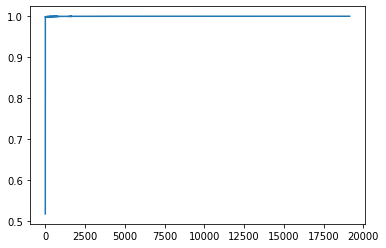

Limit of Sequence 2: 


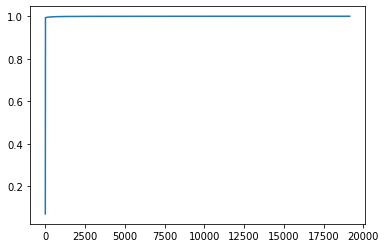

Streaming output truncated to the last 5000 lines.
it=16936  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16937  f=0.00000  |grad f|=0.00002
  x = [1.0264, 1.0262, 1.0263]
it=16938  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16939  f=0.00000  |grad f|=0.00002
  x = [1.0264, 1.0262, 1.0263]
it=16940  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16941  f=0.00000  |grad f|=0.00002
  x = [1.0264, 1.0262, 1.0263]
it=16942  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16943  f=0.00000  |grad f|=0.00002
  x = [1.0264, 1.0262, 1.0263]
it=16944  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16945  f=0.00000  |grad f|=0.00002
  x = [1.0264, 1.0262, 1.0263]
it=16946  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16947  f=0.00000  |grad f|=0.00002
  x = [1.0264, 1.0262, 1.0263]
it=16948  f=0.00000  |grad f|=0.00001
  x = [1.0264, 1.0262, 1.0263]
it=16949  f=0.00000  |grad f|=0.00002
  x = [1.0264,

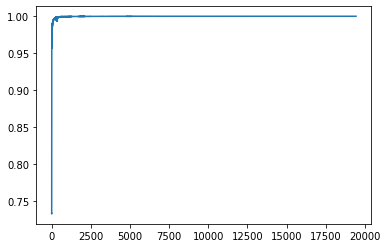

Limit of Sequence 2: 


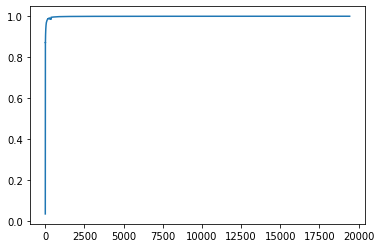

SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [29]:
METHOD_DICT = {'Gauss Newtons Methods': gaussnew}
def main():
    point_trajectories = []
    y = [[0,0,0], [1.5,0.5,0.5],[4,5,6]]
    step_size = 1.0
    max_iter = 30000
    tolerance = 1E-5
    
    x_hat = [1,1,1]
    fn_val, fn_grad, fn_hess = banana(x_hat,3)
    for i in range(0,len(y)):
      seq1 = []
      seq2 = []
      for name, func in METHOD_DICT.items():
        print(f'running {name}')
        path = func(banana, y[i], step_size, max_iter, tolerance)
        point_trajectories += [path]
        print('###############################################################')
      
      for p in range(len(point_trajectories[i])-1):
        num = point_trajectories[i][p+1] - x_hat
        den = point_trajectories[i][p] - x_hat 
        seq1.append(np.linalg.norm(num) / np.linalg.norm(den))
        
        x1 = np.array(point_trajectories[i][p+1])
        x2 = np.array(point_trajectories[i][p])
        val1, g1, h1 = banana(x1,3)
        val2, g2, h2 = banana(x2,3)
        seq2.append((val1 - fn_val) / (val2 - fn_val))
       

      print("Limit of Sequence 1: ")
      plt.plot(seq1)
      plt.show() 
      print("Limit of Sequence 2: ")
      plt.plot(seq2)
      plt.show()

if __name__ == "__main__":
    sys.exit(main())

####point 1 [0,0,0] : iteration: 15280
####point 2 [1.5, 0.5, 0.5] : iteration: 19137
####point 3 [4, 5, 6] : iteration : 19434

###We can see that Gauss Newton is faster than Steepest Descent but much slower that the other methods implemented. The direction of steepest descent works on minimizing the local rate of descent and hence is quite slow in converging to the optimal solution as compared to other methods.

#### Q1.d Calculate the condition index of the Hesian at the optimal solution and comment on the speed of convergence.

In [ ]:
x = np.array([1,1,1])
val, grad, hess = banana(x,3) 
cond = np.linalg.cond(hess) 
print(cond)


#### The output is indicating a very large value which means that speed of convergence is quite slow.

#### Q1.e For each sequence generated from a selected staring point, estimate the limits. Relate them to the theoretical bounds and discussed the speed of convergence.
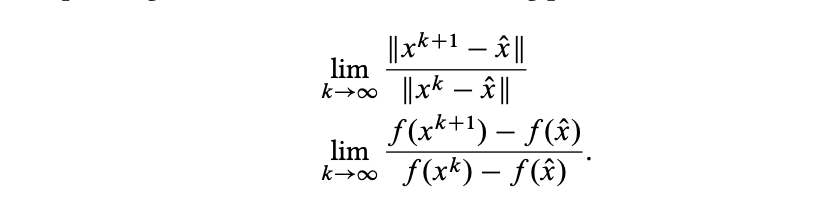


#### ( Attached in a pdf)